In [1]:
# Import required packages here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.metrics import mean_squared_error
warnings.filterwarnings("ignore")

# Section 6 : Regression by Grid Search

Consider the function , $$f(\textbf{x},\Theta) = \theta_1 x_1^2 + \theta_2 x_2$$
to be fitted to the "dataset3.npz". Assume that an initial solution to this function is already obtained by Gradient descent, it is found to $\Theta_0 = (1, 4)^T$. Perform grid search in a suitable neighbourhood of this point and precisely estimate $\Theta$.

In [2]:
x1 = np.load('x1.npy')
x2 = np.load('x2.npy')
y = np.load('y.npy')


#Construct a uniform grid
theta1 = np.linspace(0,2)
theta2 = np.linspace(3,5)

# Perform search
min_loss = mean_squared_error(1*x1**2 + 4*x2, y)
for t1 in theta1:
    for t2 in theta2:
        loss = mean_squared_error(t1*x1**2 + t2*x2,y)
        if loss < min_loss:
            min_loss = loss
            optimal_theta = [t1,t2]

print("Optimal theta value", optimal_theta)
print("Corresponding loss function", min_loss)

Optimal theta value [1.5510204081632653, 3.816326530612245]
Corresponding loss function 0.0031800700142146704


# Section 7 : Linear Regression with Sklearn

Four Main Assumptions:
1. Linear relationship between features and target,
2. Homoscedasticity: The variance of residual is the same for any value of X,
3. Independence: Observations are independent of each other,
3. No multi-collinearity among features i.e features are indepent

**General Note : Attributes and parameters should be chosen according to the question asked** 

In [3]:
# For performing regression operations
from sklearn.linear_model import LinearRegression # Fitting the linear regression
from sklearn.preprocessing import PolynomialFeatures # To convert the features into polynomial features
from sklearn.metrics import mean_squared_error # This is our cost function a.k.a loss function

### 7.1. Importing Dataset and Visualisation

1) Import the data X and y from the **"dataset2.npz"** 

2) Print the the top 10 rows of X and y. and Scattter plot of X and y

X [-4.  4.  8. -8.  6.  0. -6. -2.  2.]
Y [ 30.27196401  41.39087638 100.52268636  73.17271168  70.65513882
  12.58840376  40.1882022    7.03865692  31.62571764]


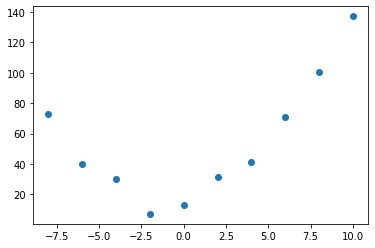

In [4]:
x = np.load('dataset2.npz')['x']
y = np.load('dataset2.npz')['y']
print("X", x[1:10])
print("Y", y[1:10])
df = pd.DataFrame({'x': x, 'y': y})
df.sort_values(by='x', inplace=True)
x = df['x'].to_numpy()
y = df['y'].to_numpy()
plt.scatter(x,y)

Fit a polynomial model (for the suggested degree) to the data. Comment on the fit (as a function of the model) in terms of the mean square error.

(Hint: Use in-built libraries from Scikit-learn for the exercise.)

### 7.2. Degree 1 (Linear)

3) Using linear regression, find a relation between $Y$ and $X$. Plot the regrssion function(vs $X$) and report the mean square error.

Mean error: 977.1734445909718


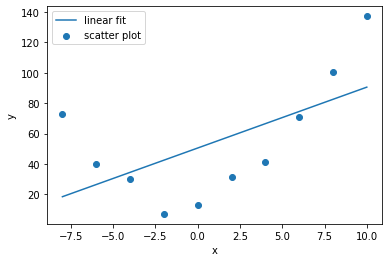

In [5]:
model = LinearRegression()
model.fit(x.reshape(-1,1), y.reshape(-1,1))
prediction = model.predict(x.reshape(-1,1))
plt.scatter(x,y)
plt.plot(x,prediction)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['linear fit', 'scatter plot'])
print("Mean error:", mean_squared_error(prediction, y))

### 7.3. Degree 2 (Quadratic)

3) Using polynomial regression of degree 2, Find a relation between $Y$ and $X$. Plot the regression function (vs $X$) and report the mean square error.

Mean error: 24.846331727808177


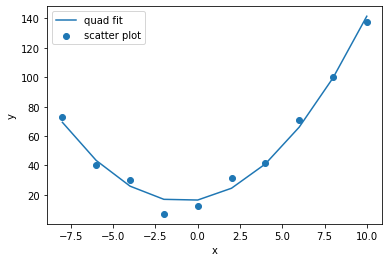

In [7]:
poly_feature = PolynomialFeatures(degree = 2)
poly_x = poly_feature.fit_transform(x.reshape(-1,1))
model = LinearRegression()
model.fit(poly_x, y.reshape(-1,1))
pred_quad = model.predict(poly_x)
plt.scatter(x,y)
plt.plot(x,pred_quad)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['quad fit', 'scatter plot'])
print("Mean error:", mean_squared_error(pred_quad, y))

### 7.4. Degree 3 (Cubic)

4) Using polynomial regression of degree 3, find a relation between $Y$ and $X$. Plot the regression function (vs $X$) and report the mean square error

Mean error:  16.26492228044507


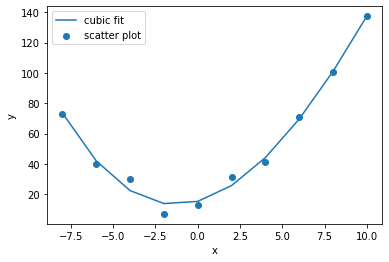

In [8]:
poly_feature = PolynomialFeatures(degree = 3)
cubic_x = poly_feature.fit_transform(x.reshape(-1,1))
model = LinearRegression()
model.fit(cubic_x, y.reshape(-1,1))
pred = model.predict(cubic_x)
plt.scatter(x,y)
plt.plot(x,pred)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['cubic fit', 'scatter plot'])
print("Mean error: ", mean_squared_error(pred, y))

### 7.5. Degree 9

5) Using polynomial regression of degree 9, find a relation between $Y$ and $X$. Plot the regression function (vs $X$) and report the mean square error.

Mean error:  5.952548709082412e-14


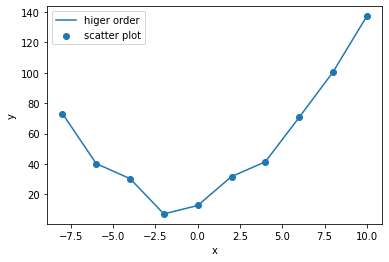

In [9]:
poly_feature = PolynomialFeatures(degree = 9)
cubic_x = poly_feature.fit_transform(x.reshape(-1,1))
model = LinearRegression()
model.fit(cubic_x, y.reshape(-1,1))
pred = model.predict(cubic_x)
plt.scatter(x,y)
plt.plot(x,pred)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['higer order', 'scatter plot'])
print("Mean error: ", mean_squared_error(pred, y))

### 7.6. Training Error

6) Plot the mean square error versus the degree of the polynomial fit (for degree = 0,1, ..., 9). Comment on the best model for the data based on MSE of training error

**Note** : Degree 0 means just the intercept

The best model purely based on training error is that of degree 9


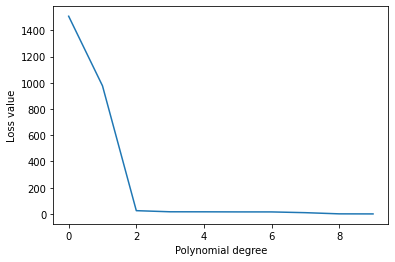

In [11]:
errors = []
model = LinearRegression()

for degree in range(10):
    poly_feature = PolynomialFeatures(degree)
    x_poly = poly_feature.fit_transform(x.reshape(-1,1))
    model.fit(x_poly, y.reshape(-1,1))
    preds = model.predict(x_poly)
    errors.append(mean_squared_error(preds, y))

plt.plot(list(range(10)), errors)
plt.ylabel('Loss value')
plt.xlabel('Polynomial degree')
print("The best model purely based on training error is that of degree 9")

### 7.7. Test error

Load **'dataset2_test.npz'**. The data points in the file are from the same distribution as the ones in 'dataset2.npz'.

7) Plot the mean square error by predicting outputs on the test dataset using the trained models of degrees 0,1,...9 obtained with the training data set **dataset2.npz**. Now, comment on the best model for data based on MSE on both training and test datasets.

(Hint: Plot Training error and Testing error in the same plot.) Use Matplotlib for plotting

Evidently, degree 2 polynomial performs best on test set
Infact observe that it is kind of the critical degree as the test set error takes off after that


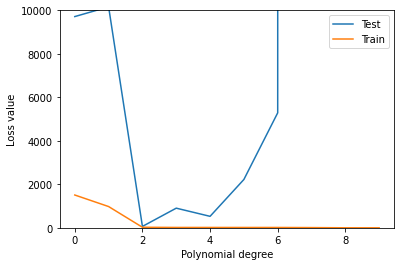

In [12]:
test_data = np.load('dataset2_test.npz')
x_test = test_data['x']
y_test = test_data['y']
temp = pd.DataFrame({'x': x_test, 'y': y_test})
temp.sort_values(by='x', inplace=True)
x_test = temp['x'].to_numpy()
y_test = temp['y'].to_numpy()

test_errors = []
model = LinearRegression()

for degree in range(10):
    poly = PolynomialFeatures(degree)
    x_poly = poly.fit_transform(x.reshape(-1,1))
    x_test_poly = poly.fit_transform(x_test.reshape(-1,1))

    model.fit(x_poly, y.reshape(-1,1))
    preds = model.predict(x_test_poly)
    test_errors.append(mean_squared_error(preds, y_test))

plt.plot(list(range(10)), test_errors)
plt.plot(list(range(10)), errors)
plt.ylim(0,10000)
plt.ylabel('Loss value')
plt.xlabel('Polynomial degree')
plt.legend(['Test','Train'])
print('Evidently, degree 2 polynomial performs best on test set')
print('Infact observe that it is kind of the critical degree as the test set error takes off after that')

### 7.8. Best Degree of polynomial

8)Hint : Based on Test error.

In [15]:
#Polynomial of degree 2

# Section 8 : Multiple Linear Regression on Boston Housing Price Data
Import data from **"dataset3.csv"**. This is one among the sklearn standard datasets which can be used to develop a model for house price prediction "load_boston". Description of the features can be found in the sklearn documentation if you want to explore.

## 8.1. Describe the data
Hint :  Categorical features = ['RAD', 'CHAS', 'ZN'], Non-categorical features = Except categorical all the other features
1. Find Mean, Median for Non-categorical features and Price, Mode only for Categorical feaures
2. Find Quantiles at 25th, 50th, 75th for Non-categorical features and Price
3. Find Maximum and Minimum, Range of the data (max -min) for Non-categorical features and Price
4. Find Distributions (Histogram) for Non-categorical features and Price (Using Seaborn is suggested)

**Note** - Dont use pandas.describe here. You may use inbuilt functions from numpy package. You can store the above descriptive statistics in a dataframe and print that dataframe.

In [16]:
data = pd.read_csv('dataset3.csv')

## 8.2. Correlation Heatmap for all the features and target
**Hint** : Use Seaborn library to plot, note keep annotate = True

In [17]:
df = pd.read_csv('dataset3.csv')
cat_cols = ['RAD', 'CHAS', 'ZN']
df_cat = df[cat_cols]
df_num = df.drop(cat_cols, axis = 1)

cat_dict = dict()
for col in cat_cols:
    cat_dict[col] = {'Mode': df_cat[col].mode()[0]}
    
num_dict = dict()
for col in df_num.columns:
    num_dict[col] = {'Mean': df_num[col].mean(), 
                     'Median': df_num[col].mean(), 
                     '25-quantile': df_num[col].quantile(0.25), 
                     '75-quantile': df_num[col].quantile(0.75), 
                     'Min': df_num[col].min(),  'Max': df_num[col].max(),
                     'Range': df_num[col].max() - df_num[col].min()}
    
num_stats = pd.DataFrame(num_dict)
num_stats

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,Price
Mean,3.613524,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
Median,3.613524,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
25-quantile,0.082045,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
75-quantile,3.677083,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
Min,0.006320,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
Max,88.976200,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000
Range,88.969880,27.280000,0.486000,5.219000,97.100000,10.996900,524.000000,9.400000,396.580000,36.240000,45.000000


In [18]:
cat_stats = pd.DataFrame(cat_dict).T
cat_stats

,Mode
RAD,24.0
CHAS,0.0
ZN,0.0


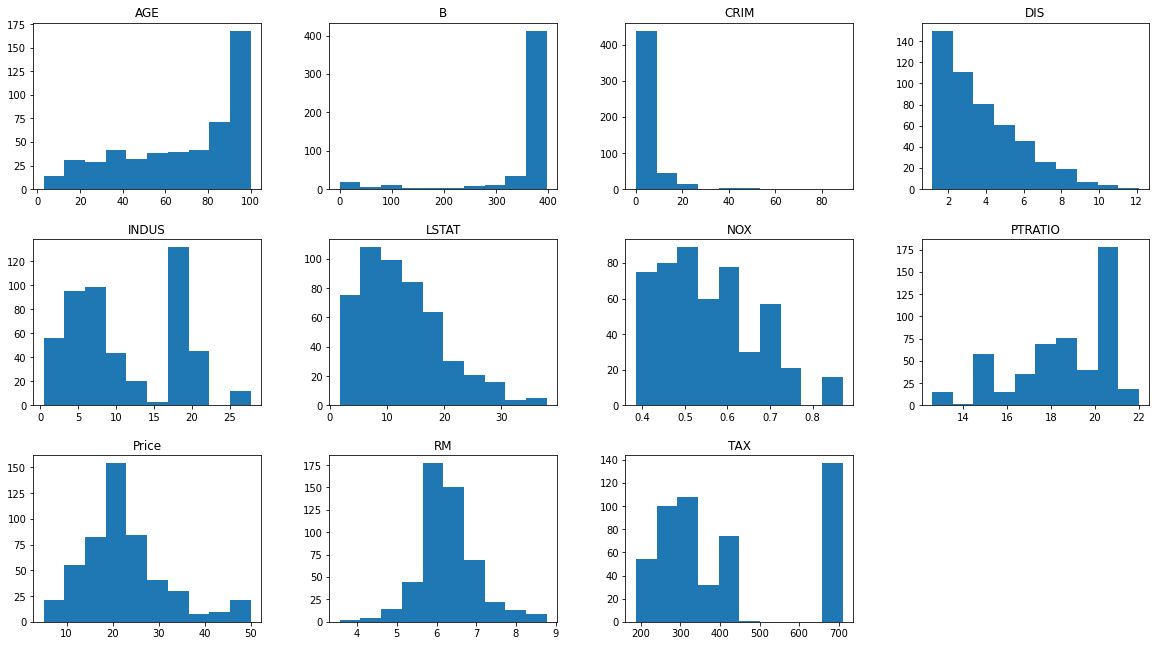

In [19]:
df_num.hist(figsize = (20, 15), grid = False, layout = (4, 4));

## 8.3. Highly Correlated features
Find and print the highly correlated features with respect to "Price". 

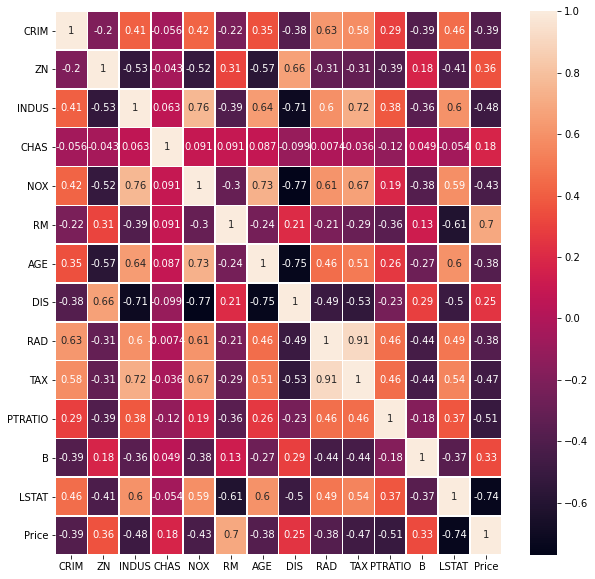

In [20]:
fig, ax = plt.subplots(figsize = (10,10))         
sns.heatmap(df.corr(), annot = True, linewidths = .5, ax = ax);

In [21]:
correl = df.corrwith(df['Price'], axis = 0).apply(lambda x: abs(x)).sort_values(ascending = False)
print(correl[1: 6]) # top 5 correlated features

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
dtype: float64


## 8.4. Split the Dataset
**Hint** : Use sklearn train_test_split to split the data into train and test data, keep random state = 2020 and test_size = 0.33

In [22]:
from sklearn.model_selection import train_test_split
y = df['Price']
X = df.drop('Price', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 2020)

## 8.5. Train the model on only train data using linear_regression
Report Train MSE

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

## 8.6. Predict Outputs for Test Data
Report test MSE

In [24]:
X_test = scaler.transform(X_test)
y_pred = reg.predict(X_test)
test_mse = np.mean(np.square(y_test - y_pred))
print(test_mse)

22.004861555354605


## 8.7. Important Features
Find and print the featuers in order of their importance based on trained regression model.

In [25]:
coeffs = np.abs(reg.coef_)

__, cols = zip(*sorted(zip(coeffs, df.columns)))
print(f'Most important features = {list(reversed(cols[-5:]))}') 

Most important features = ['RM', 'LSTAT', 'DIS', 'CRIM', 'PTRATIO']


# Q&A Section :
1. Comment on assumptions validity discussed in Section 7 with this dataset? Whether we satisfied assumptions or not.
2. Is there any relation between highly important features(from Section 8.7) and highly correlated features with price?Only give descriptive observation.
3. Why usually test error is higher than training error?
4. Will Analytical solution discussed in the Notebook 1 Section 2 be valid on this dataset? Why or Why not?

In [26]:
#1. The relationship between variables can be intertwinned. So independence is not a good assumption.
#Same goes for linear dep. It is difficult analyze quantitatively of Homoscedasticity, but we can see from 
#the histograms that the features are not normally distributed. 

#2. The regression coefficient is directly related to the correlation coefficient between 
#the target and the independent variable. Infact, it is highly correlated.

#3. Test set error is usually high becomes it is unseen data. So usually when we report accuracy it is the test 
#error which we talk about. 

#4. Analytical soln is always valid. But issue is, when data set becomes huge, matrix computations become
#exponentially expensive and therfore one resorts to optimization techniques.